In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.shape

(42000, 785)

In [3]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
13064,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


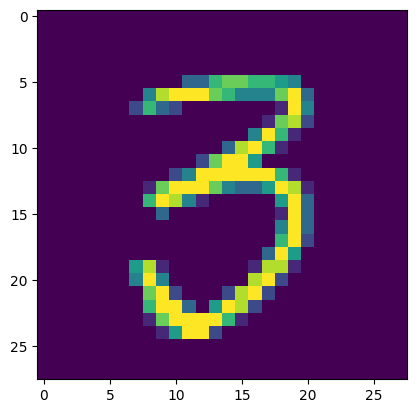

In [4]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[13064,1:].values.reshape(28,28))

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train.shape

(33600, 784)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [10]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

13.906776189804077


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# PCA 
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [28]:
pca.explained_variance_ratio_[:10]

array([0.05785192, 0.0414927 , 0.03804239, 0.02966263, 0.02581562,
       0.0225498 , 0.01973068, 0.0177528 , 0.01568651, 0.01436063])

In [21]:
pca.explained_variance_[:10]

array([40.67111198, 29.17023401, 26.74459621, 20.85344792, 18.14891878,
       15.8529825 , 13.87108101, 12.48058967, 11.02794236, 10.09582533])

In [17]:
pca.explained_variance_.shape

(784,)

In [23]:
pca.components_[:5]

array([[-1.50074992e-19, -0.00000000e+00,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.77002386e-20,  3.46944695e-17,  1.45716772e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.53221129e-20, -4.16333634e-17,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.75338309e-19, -5.55111512e-17, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.73535948e-19, -5.55111512e-17,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [22]:
pca.components_.shape

(784, 784)

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

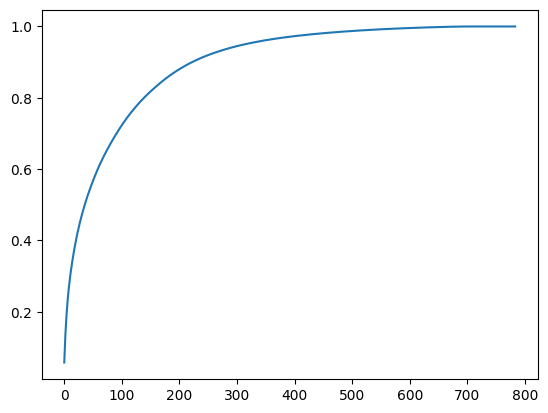

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [29]:
X_train_trf.shape

(33600, 784)

In [32]:
for i in range(1,785,100):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.2571428571428571
0.9534523809523809
0.9501190476190476
0.9469047619047619
0.9439285714285715
0.9411904761904762
0.94
0.9391666666666667


In [33]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [34]:
X_train_trf

array([[-2.71862994, -0.48934093],
       [-0.67699077, -6.75333324],
       [-3.03325597,  6.5105217 ],
       ...,
       [ 2.14883845,  0.78004191],
       [ 1.05959469,  0.94783539],
       [17.70263313,  1.96098803]])

In [36]:
import plotly.express as px

In [ ]:
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [37]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [38]:
X_train_trf

array([[-2.71863556, -0.48985973,  1.13539174],
       [-0.6770013 , -6.75361935, -2.33596821],
       [-3.03320397,  6.51021986,  7.49267856],
       ...,
       [ 2.14882661,  0.78045583, -0.74779974],
       [ 1.05958299,  0.94773889,  3.94989289],
       [17.70257685,  1.96168747, -4.94399188]])

In [ ]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
# Update marker size
fig.update_traces(marker=dict(size=12))
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()